In this notebook, we reproduce de expresions for the coefficients $C_i$, $C_{ij}$ from [Hong2024](https://arxiv.org/pdf/2312.11427) equation (A5)

In [1]:
from sympy import symbols, init_printing, Eq, S, solve, factor, simplify, sqrt, re, series, Order
init_printing()

In [2]:
from sympy import Matrix, eye
mD, MR, muX = symbols(r'm_D, M_R, \mu_X', positive=True)
lamb = symbols('lambda')

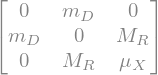

In [3]:
Mnu = Matrix(
    [
        [0, mD, 0],
        [mD, 0, MR],
        [0, MR, muX ]
    ]
)
Mnu

In [4]:
Mnuinv = Mnu.inv()

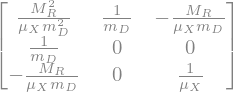

In [5]:
Mnuinv

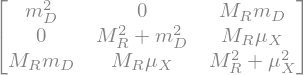

In [6]:
Mnu2 = Mnu.T*Mnu
Mnu2

In [7]:
svd2 = Mnu2.singular_values()

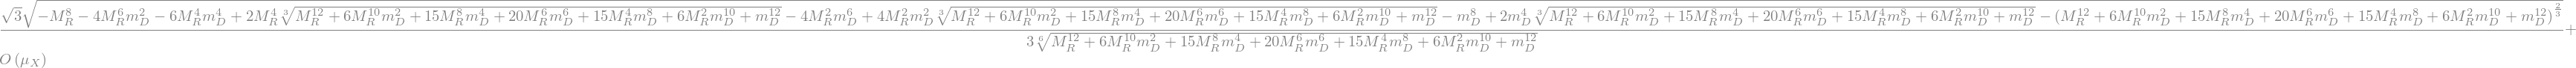

In [8]:
svd2[0].series(muX,0,1)

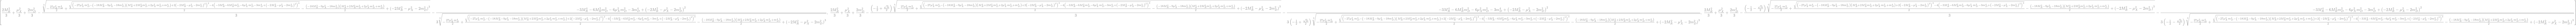

In [193]:
roots_square = list(Mnu2.eigenvals().keys())
roots_square

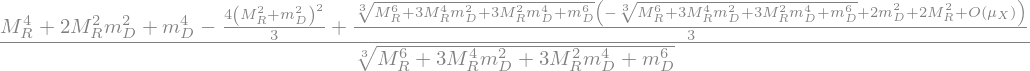

In [197]:
roots_square[0].series(muX,0,1).simplify()

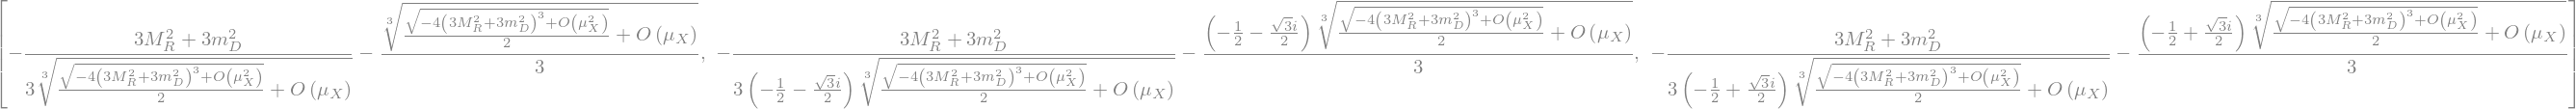

In [138]:
# Vamos a usar una expansión en serie de Taylor alrededor de mu_X = 0
# Para los otros valores propios, considerando una pequeña perturbación

# Polinomio característico de la matriz completa:
polinomio_caracteristico_completo = (Mnu-lamb*eye(3)).det()

# Expansión en series de Taylor alrededor de mu_X = 0
expansion_taylor = series(polinomio_caracteristico_completo, muX, 0, 1)
display(expansion_taylor)
# Solución de los valores propios con la expansión
valores_propios_perturbados = solve(expansion_taylor, lamb)
valores_propios_perturbados


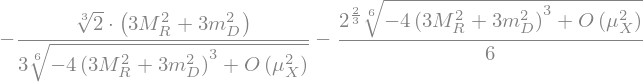

In [145]:
valores_propios_perturbados[0].subs(Order(muX), 0)

In [200]:
charpoly = (Mnu-lamb*eye(3)).det()

In [201]:
charpoly.factor()

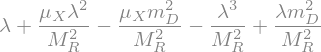

In [186]:
(charpoly/MR**2).expand()

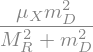

In [95]:
mnu_m = mD**2/(mD**2 + MR**2)*muX
mnu_m

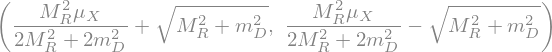

In [98]:
mN1_m = sqrt(mD**2 + MR**2) + MR**2*muX/(2*(mD**2 + MR**2))
mN2_m = -sqrt(mD**2 + MR**2) + MR**2*muX/(2*(mD**2 + MR**2))
mN1_m, mN2_m

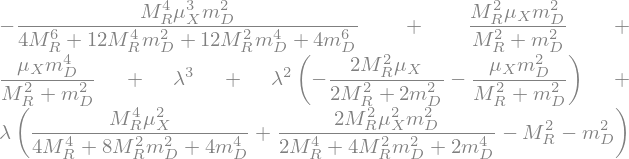

In [101]:
charpoly_m = (lamb - mnu_m)*(lamb - mN1_m)*(lamb - mN2_m)
charpoly_m.expand().collect(lamb)

In [104]:
roots_m = solve(charpoly_m, lamb)

In [112]:
(roots_m[2].factor() - mnu_m).simplify()

In [202]:
roots = solve(charpoly, lamb)

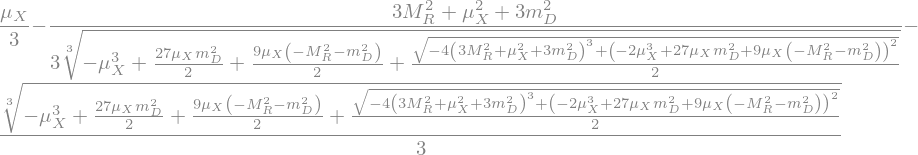

In [203]:
roots[0]

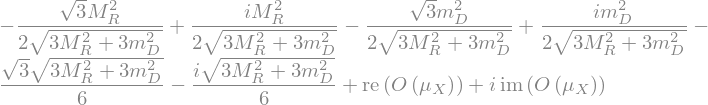

In [208]:
roots[0].series(muX,0,1).expand(complex=True)

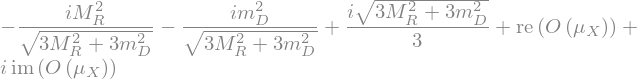

In [209]:
roots[1].series(muX,0,1).expand(complex=True)

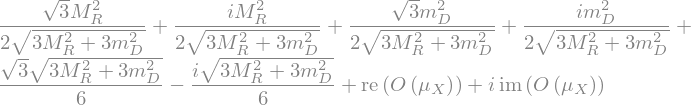

In [210]:
roots[2].series(muX,0,1).expand(complex=True)

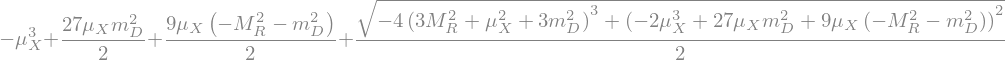

In [115]:
inner_root1 = roots[0].args[0].args[1].args[0]
inner_root1

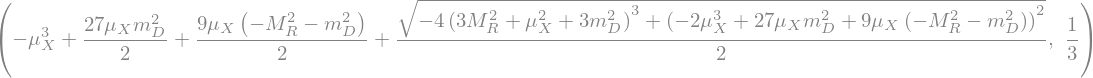

In [116]:
roots[0].args[0].args[1].args

In [74]:
inner_root2 = roots[0].args[0].args[1].args[0].args[0].args[1].args[0]
inner_root2

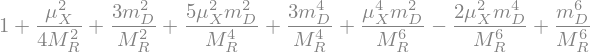

In [118]:
inner_root2_m6 = (inner_root2.simplify().expand()/(-108*MR**6)).expand()
inner_root2_m6

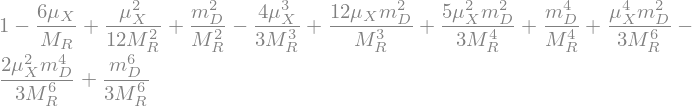

In [120]:
inner_root1_m6 = (inner_root1.subs(sqrt(inner_root2), MR**3*(1 + inner_root2_m6/2)).simplify().expand()*(S(4)/(3*MR**3))).expand()
inner_root1_m6

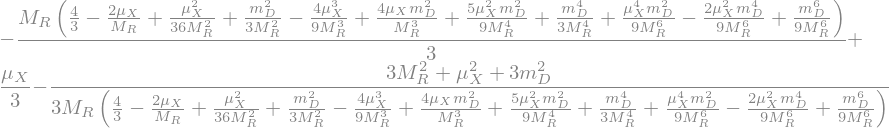

In [122]:
roots[0].subs((inner_root1)**(S(1)/3), MR*(1 + inner_root1_m6/3))

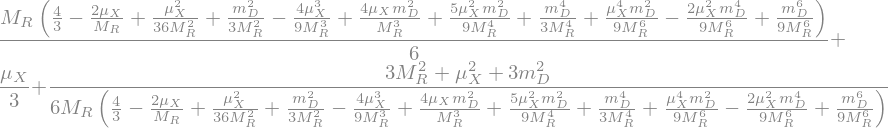

In [125]:
re(roots[1].subs((inner_root1)**(S(1)/3), MR*(1 + inner_root1_m6/3)))

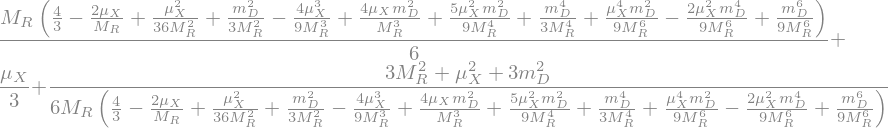

In [126]:
re(roots[2].subs((inner_root1)**(S(1)/3), MR*(1 + inner_root1_m6/3)))